In [21]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = [16,8]

# Boa para prever dados sem tendencia e sem padrão sazonal claro

In [22]:
df = pd.read_excel('serie_historica_volume_portos.xlsx')
planta = input("Qual planta e processo para escolher: ")

In [23]:
df_2 = df[df['PLANTA_PROCESSO'] == planta]
df_2.sort_values('DATA')

,PLANTA_PROCESSO,DATA,TOTAL_VALOR
9529,1123 - Guaíba | DESCARGA,2017-08-31 12:00:00,208607.000
7402,1123 - Guaíba | DESCARGA,2017-09-01 12:00:00,169184.442
7489,1123 - Guaíba | DESCARGA,2017-09-02 12:00:00,250431.772
7215,1123 - Guaíba | DESCARGA,2017-09-03 12:00:00,190506.226
7970,1123 - Guaíba | DESCARGA,2017-09-04 12:00:00,205166.000
...,...,...,...
8027,1123 - Guaíba | DESCARGA,2022-08-25 12:00:00,134474.000
8692,1123 - Guaíba | DESCARGA,2022-08-26 12:00:00,132774.000
9246,1123 - Guaíba | DESCARGA,2022-08-27 12:00:00,196858.000
9492,1123 - Guaíba | DESCARGA,2022-08-28 12:00:00,250005.000


In [24]:
df_g = df_2.resample(rule='M', on='DATA')['TOTAL_VALOR'].sum()

Aplicando o modelo de Suavização Exp Simples

In [25]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [26]:
fit1 = SimpleExpSmoothing(df_g).fit(smoothing_level=0.2, optimized=False)
fcast1 = fit1.forecast(12).rename(r'alpha=0.2$')

<AxesSubplot: xlabel='DATA'>

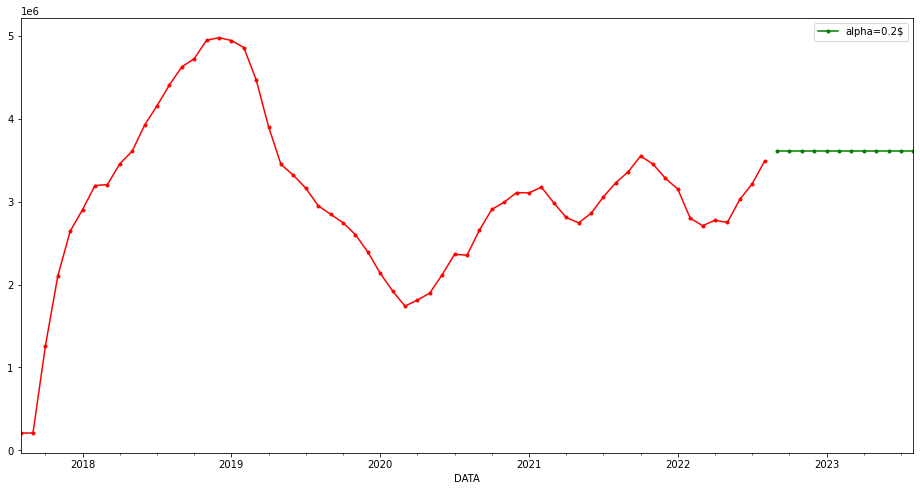

In [27]:
fcast1.plot(marker='.', color='green', legend=True)
fit1.fittedvalues.plot(marker='.', color='red')

c:\Users\LVVE2K631\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<AxesSubplot: xlabel='DATA'>

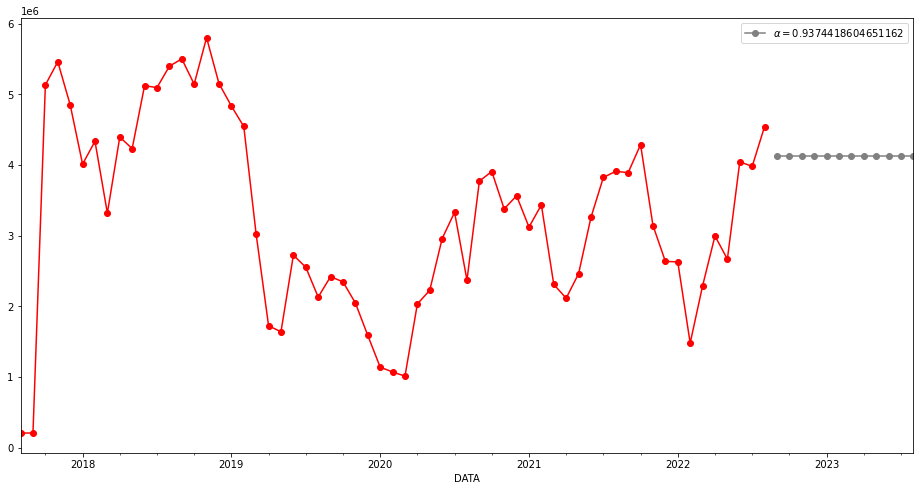

In [28]:
# Otimizando o valor de alpha
fit2 = SimpleExpSmoothing(df_g).fit()
fcast2 = fit2.forecast(12).rename(r'$\alpha=%s$'%fit2.model.params['smoothing_level'])

fcast2.plot(marker='o', color='gray', legend=True)
fit2.fittedvalues.plot(marker='o', color='red')

Agora vamos ver com de Holt's linear trend (amortecida)

In [29]:
fit4 = Holt(df_g).fit(smoothing_level=0.8, smoothing_trend=0.2, optimized=False)
fcast4 = fit4.forecast(24).rename("Holt's L ")

<AxesSubplot: xlabel='DATA'>

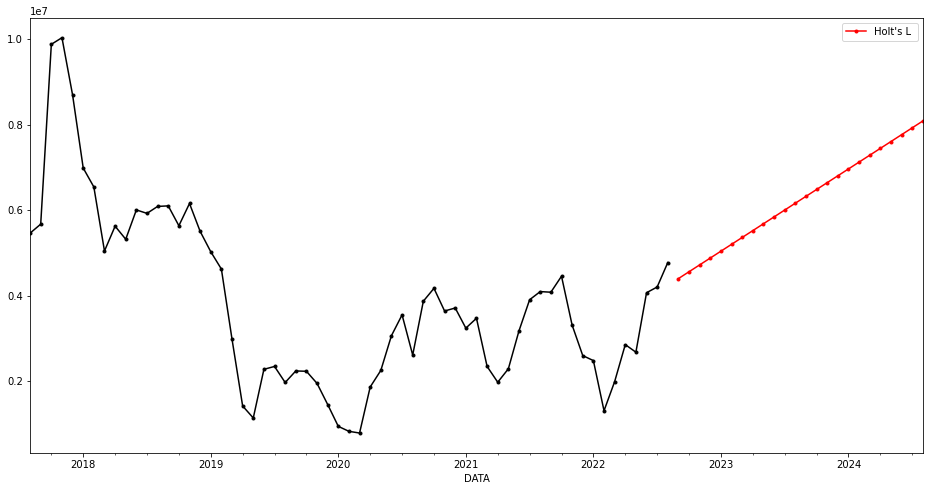

In [30]:
fit4.fittedvalues.plot(marker='.', color='black')
fcast4.plot(color='red', marker='.', legend=True)

In [31]:
fit5 = Holt(df_g, damped_trend=True).fit(smoothing_level=0.8, smoothing_trend=0.2)
fcast5 = fit5.forecast(24).rename("Aditivo Amortecido")

c:\Users\LVVE2K631\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<AxesSubplot: xlabel='DATA'>

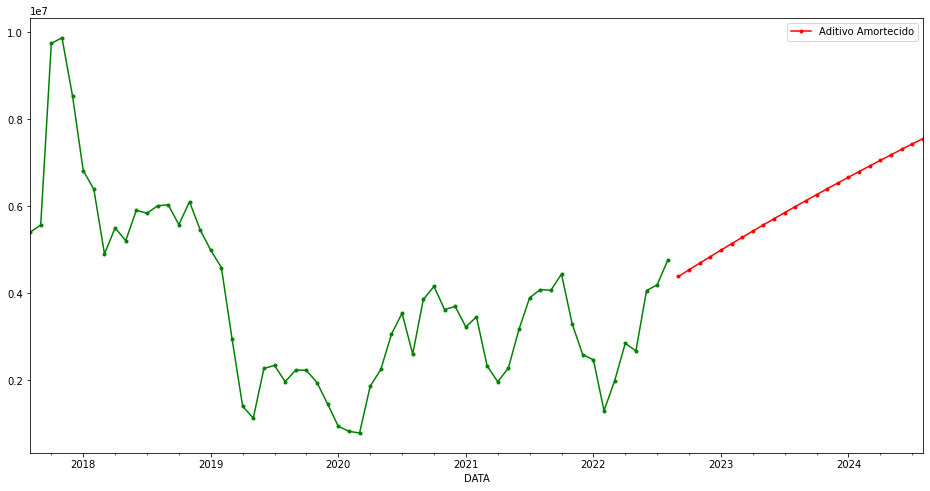

In [32]:
fit5.fittedvalues.plot(style=marker='o', color='green')
fcast5.plot(color='red', marker='o', legend=True)

### Agora vamos aplicar o Holt Winters (tendencia e sazonalidade). Essa mais sofisticada que as anteriores

In [35]:
fit6 = ExponentialSmoothing(df_g, seasonal_periods=12, trend='additive', seasonal='additive').fit()

c:\Users\LVVE2K631\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<AxesSubplot: xlabel='DATA'>

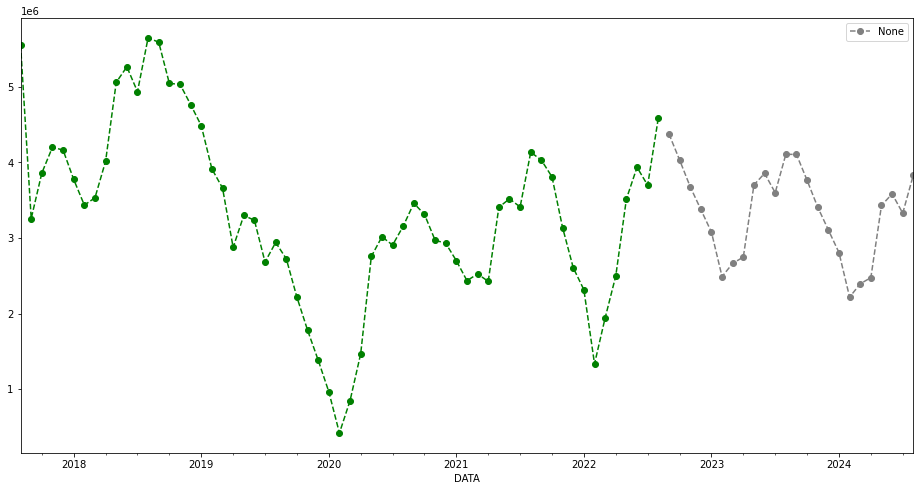

In [38]:
fit6.fittedvalues.plot(style='--', marker='o', color='green')
fit6.forecast(24).plot(style='--', marker='o', color='gray', legend=True)